# Lab CMBLenses

## Model

In [18]:
] activate "/home/jaimerz/julia_repos/CMBLensingInferenceTestProblem"

  Activating project at `~/julia_repos/CMBLensingInferenceTestProblem`


In [19]:
using CMBLensing, CMBLensingInferenceTestProblem
using CUDA, LaTeXStrings, MCMCDiagnosticTools, Plots, ProgressMeter, Random, Zygote
using LinearAlgebra, Statistics
ENV["LINES"] = 10;

In [20]:
using Revise
using MicroCanonicalHMC

In [21]:
prob = load_cmb_lensing_problem(storage = Array,
                                T = Float32,
                                Nside = 4);

In [22]:
target = CMBLensingTarget(prob);

## Sample

In [90]:
spl=MCHMC(0.00005, 0.1; sigma=ones(Float32, 50))

MicroCanonicalHMC.Sampler(Settings(MersenneTwister(0), 0.2, 0, 1000, 100, "LF", nothing, nothing, nothing), Hyperparameters(5.0f-5, 0.1f0, 0.0f0, 0.19318333f0, Float32[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]), MicroCanonicalHMC.Leapfrog)

In [91]:
init_state, init_sample = MicroCanonicalHMC.Init(spl, target)

((Float32[0.49172187, 3.3348827, -3.863252, -6.7174473, 1.7892076, 4.633311, -2.5502522, -5.4095893, 3.8559768, 6.7021303  …  -0.049881008, -0.0009288462, 0.0768578, 0.020462297, -0.1136247, -0.033653107, 0.054052047, -0.026206896, -1.609438, 0.0], Float32[0.06944448, 0.15494663, 0.0758591, -0.19624087, 0.26883823, -0.13506283, -0.191033, -0.019190256, -0.026318114, -0.02934459  …  -0.13202287, 0.20297481, 0.09073265, 0.06820883, -0.17393985, 0.23213816, -0.04787222, 0.25022978, -0.19829062, 0.027230114], -376.99704f0, Float32[-6.348637f-7, 1.1321916f-6, 5.1763396f-7, -2.5413323f-7, -2.2019454f-7, 1.6302118f-6, 4.2543058f-7, -1.3857881f-6, -7.2332494f-7, -2.949465f-7  …  2018.1753, -1663.6976, -1352.4008, 388.09454, 509.89447, 941.7612, 916.75323, -1430.1068, -0.0013911967, 0.53047454], 0.0), [0.49172186851501465, 3.3348827362060547, -3.8632519245147705, -6.717447280883789, 1.7892075777053833, 4.633310794830322, -2.5502521991729736, -5.4095892906188965, 3.8559768199920654, 6.7021303176

In [92]:
state, sample = MicroCanonicalHMC.Step(spl, target, init_state)

((Float32[0.49172533, 3.3348904, -3.863248, -6.7174573, 1.789221, 4.633304, -2.5502617, -5.4095902, 3.8559754, 6.702129  …  -0.049887653, -0.00091866223, 0.076862365, 0.020465696, -0.1136334, -0.033641532, 0.054049633, -0.026194356, -1.6094478, 1.3606415f-6], Float32[0.06945499, 0.15497006, 0.07587058, -0.19627056, 0.2688789, -0.13508326, -0.19106191, -0.01919316, -0.026322097, -0.02934903  …  -0.13309737, 0.2039742, 0.09216441, 0.06753614, -0.17385578, 0.23037255, -0.04765904, 0.25062397, -0.19832061, 0.027233703], -376.99704f0, Float32[1.0532722f-5, 1.4446976f-5, 6.858911f-6, -1.0539419f-5, 2.7116408f-5, -5.834857f-6, -1.0720472f-5, 3.057878f-6, -2.827141f-7, -1.3544264f-6  …  89.9315, -272.7859, -1482.4894, 977.3749, -730.6146, 2658.2634, -1357.4999, 717.8097, -0.0013911829, 0.5304737], -0.0075683594f0), [0.4917253255844116, 3.334890365600586, -3.863248109817505, -6.717457294464111, 1.7892210483551025, 4.633304119110107, -2.5502617359161377, -5.409590244293213, 3.855975389480591, 6.

In [93]:
x, u, l, g, dE = state
println(u)

Float32[0.06945499, 0.15497006, 0.07587058, -0.19627056, 0.2688789, -0.13508326, -0.19106191, -0.01919316, -0.026322097, -0.02934903, -0.066629805, 0.077837095, -0.067574926, -0.2792394, -0.15241662, -0.08660212, 0.06641776, 0.07782896, 0.013333698, -0.17788862, 0.018664366, 0.08307882, -0.33608636, -0.2377099, 0.018960236, -0.14418477, 0.09298273, 0.029373594, 0.074171774, -0.04752343, 0.103946134, -0.19285168, -0.1521802, 0.010541625, -0.0066853464, 0.074104734, 0.24221216, -0.11538795, -0.082742676, -0.016218284, -0.13309737, 0.2039742, 0.09216441, 0.06753614, -0.17385578, 0.23037255, -0.04765904, 0.25062397, -0.19832061, 0.027233703]


In [103]:
samples = Sample(spl, target, 500; dialog=true)

5001-element Vector{Any}:
 [0.49172186851501465, 3.3348827362060547, -3.8632519245147705, -6.717447280883789, 1.7892075777053833, 4.633310794830322, -2.5502521991729736, -5.4095892906188965, 3.8559768199920654, 6.702130317687988  …  0.0768577978014946, 0.020462296903133392, -0.1136246994137764, -0.03365310654044151, 0.054052047431468964, -0.02620689570903778, -1.6094379425048828, 0.0, 0.0, 376.9970397949219]
 [0.4917241036891937, 3.334874391555786, -3.863246440887451, -6.717442512512207, 1.7892147302627563, 4.633312225341797, -2.5502402782440186, -5.409590721130371, 3.855984926223755, 6.702126979827881  …  0.076858289539814, 0.020464876666665077, -0.11362335085868835, -0.03364855423569679, 0.05405242368578911, -0.026215502992272377, -1.609439492225647, 6.992615453782491e-6, -0.115203857421875, 376.9970703125]
 Float32[0.49172634, 3.3348658, -3.8632405, -6.7174373, 1.7892219, 4.6333137, -2.5502286, -5.409592, 3.8559933, 6.702123  …  0.07685853, 0.020467587, -0.113622464, -0.03364414, 0.

## Plotting

In [112]:
Plots.default(fmt=:png, dpi=120, size=(500,300), legendfontsize=10)

In [113]:
rs = [sample[49] for sample in samples]
Aϕs = [sample[50] for sample in samples];

In [114]:
Aϕs

5001-element Vector{AbstractFloat}:
 0.0
 6.992615453782491e-6
 1.4126323f-5
 ⋮
 0.026589712f0
 0.026596554f0

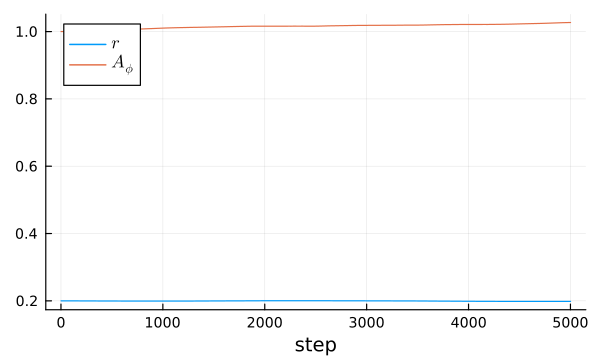

In [115]:
plot(exp.(rs), label=L"r", xlabel="step")
plot!(exp.(Aϕs), label=L"A_\phi")


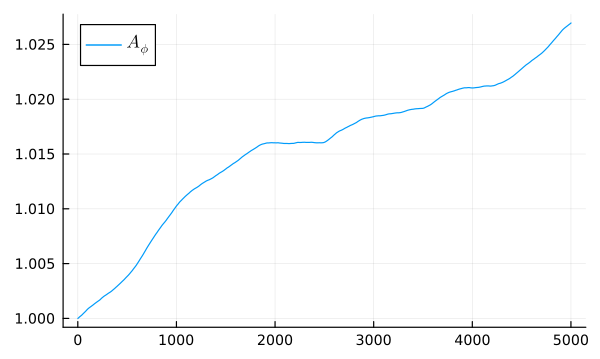

In [116]:
#plot(exp.(rs), label=L"r", xlabel="step")
plot(exp.(Aϕs), label=L"A_\phi")


In [117]:
Energy = [sample[end-1] for sample in samples]

5001-element Vector{AbstractFloat}:
  0.0
 -0.115203857421875
 -0.42181396f0
  ⋮
  0.007751465f0
  0.040618896f0

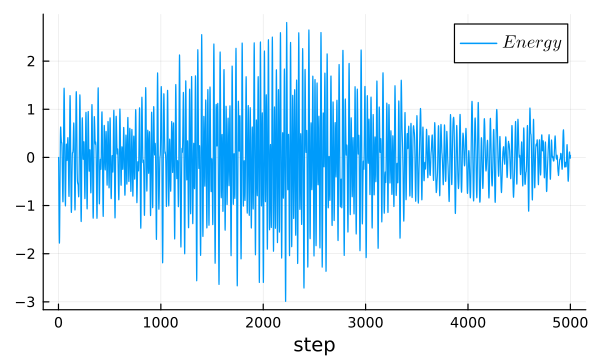

In [118]:
plot(Energy, label=L"Energy", xlabel="step")

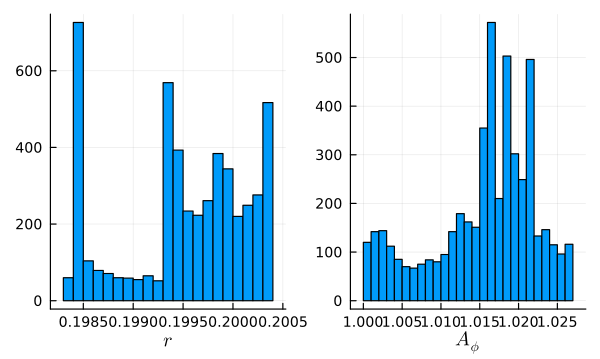

In [111]:
plot(histogram(exp.(rs), xlabel=L"r", label=nothing, lw=1),
    histogram(exp.(Aϕs), xlabel=L"A_\phi", label=nothing, lw=1))